In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

# get the output for all commands

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'


In [2]:
loan_df = pd.read_csv(r"C:\Users\psath\Downloads\Machine Learning(Loan Prediction)\credit_risk_dataset.csv",skipinitialspace = True)


In [3]:
loan_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
loan_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Checking for Duplicates

In [5]:
loan_df.duplicated()
loan_df.duplicated().value_counts()

0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 32581, dtype: bool

False    32416
True       165
dtype: int64

In [6]:
# Dataframe indexing
loan_df[loan_df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [7]:
loan_df.drop_duplicates(keep = 'first', inplace = True)

In [8]:
loan_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## Identifying Null Values

In [9]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


**There are some null values in person_emp_length and loan_int_rate column**

In [10]:
loan_df[loan_df.person_emp_length.isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [11]:
loan_df[loan_df.loan_int_rate.isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [12]:
loan_df.person_emp_length = loan_df.person_emp_length.fillna(loan_df.person_emp_length.median())

In [13]:
loan_df.loan_int_rate = loan_df.loan_int_rate.fillna(loan_df.loan_int_rate.median())

In [14]:
loan_df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Identify Corrupted Data

In [15]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


## Identify the Outliers

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

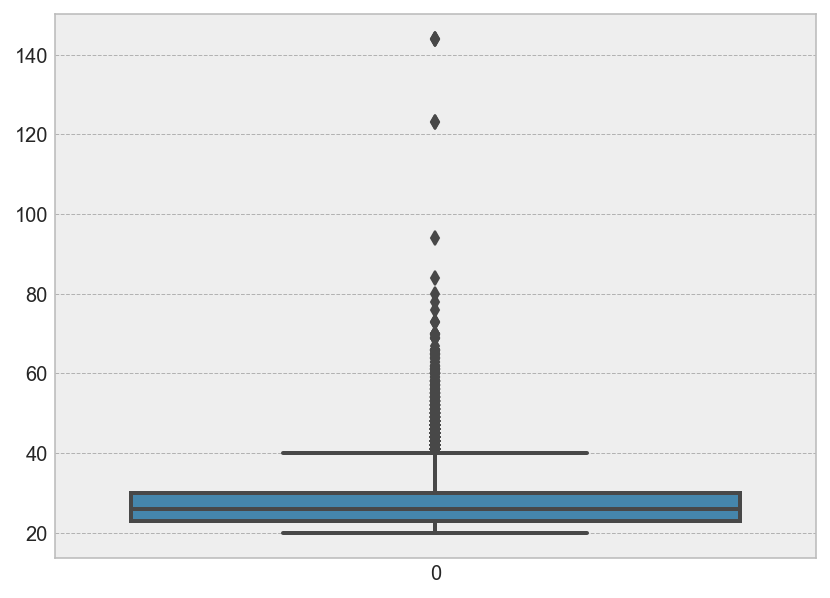

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(loan_df.person_age )



In [17]:
Q1, Q2, Q3 = tuple(loan_df.person_age .quantile(q = [0.25,0.5,0.75]).values)
print(Q1, Q2, Q3)
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

loan_df[(loan_df.person_age  > UL) | (loan_df.person_age  < LL)]

23.0 26.0 30.0
7.0 40.5 12.5


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,10.99,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [18]:
droplist = loan_df[(loan_df.person_age  > UL) | (loan_df.person_age  < LL)].index.to_list()

In [19]:
loan_df.drop(droplist, axis = 0, inplace = True)

In [20]:
loan_df.reset_index(inplace = True)


In [21]:
loan_df

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30920,32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15
30921,32292,38,200000,MORTGAGE,0.0,DEBTCONSOLIDATION,A,3000,7.68,0,0.01,N,12
30922,32293,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13
30923,32294,36,92000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,4000,7.29,0,0.04,N,13


In [22]:
loan_df.drop(['index'], axis=1, inplace = True)

In [23]:
loan_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
30920,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15
30921,38,200000,MORTGAGE,0.0,DEBTCONSOLIDATION,A,3000,7.68,0,0.01,N,12
30922,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13
30923,36,92000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,4000,7.29,0,0.04,N,13


<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

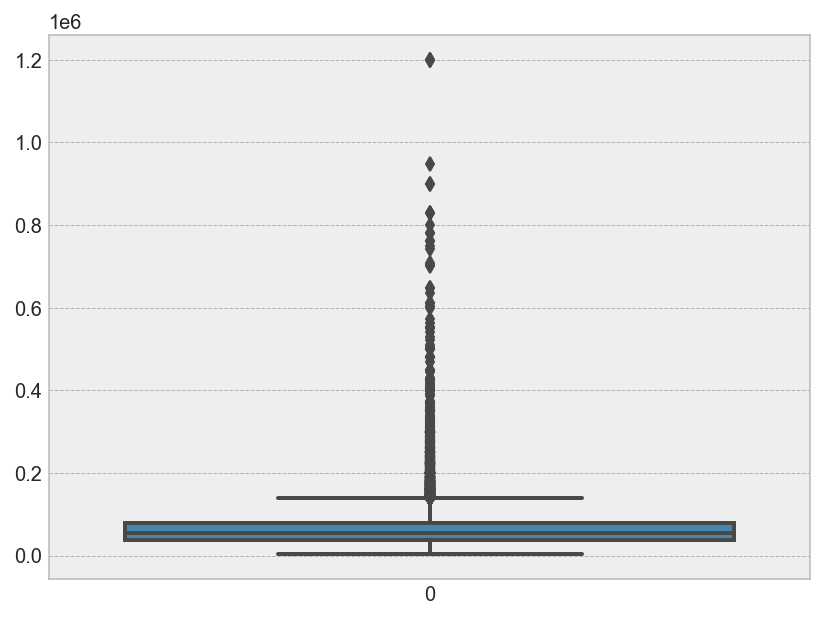

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(loan_df.person_income)



In [25]:
Q1, Q2, Q3 = tuple(loan_df.person_income.quantile(q = [0.25,0.5,0.75]).values)
print(Q1, Q2, Q3)
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

loan_df[(loan_df.person_income > UL) | (loan_df.person_income  < LL)]

38400.0 55000.0 78750.0
40350.0 139275.0 -22125.0


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4
33,25,306000,RENT,2.0,DEBTCONSOLIDATION,C,24250,13.85,0,0.08,N,3
34,26,300000,MORTGAGE,10.0,MEDICAL,C,7800,13.49,0,0.03,N,4
42,26,300000,MORTGAGE,10.0,VENTURE,A,20000,7.88,0,0.07,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
30885,38,140000,MORTGAGE,0.0,VENTURE,B,25000,9.99,0,0.18,N,13
30898,36,160000,OWN,20.0,VENTURE,D,24000,14.96,0,0.15,Y,15
30901,39,325000,MORTGAGE,14.0,PERSONAL,D,18000,14.96,0,0.06,Y,17
30909,39,150000,MORTGAGE,9.0,MEDICAL,A,30000,8.90,0,0.20,N,11


In [26]:
droplist = loan_df[(loan_df.person_income  > UL) | (loan_df.person_income  < LL)].index.to_list()

In [27]:
loan_df.drop(droplist, axis = 0, inplace = True)

In [28]:
loan_df.reset_index(inplace = True)

In [29]:
loan_df

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29452,30919,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,B,1000,10.99,0,0.03,N,15
29453,30920,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15
29454,30922,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13
29455,30923,36,92000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,4000,7.29,0,0.04,N,13


In [30]:
loan_df.drop(['index'], axis=1, inplace = True)

In [31]:
loan_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
29452,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,B,1000,10.99,0,0.03,N,15
29453,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15
29454,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13
29455,36,92000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,4000,7.29,0,0.04,N,13


<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

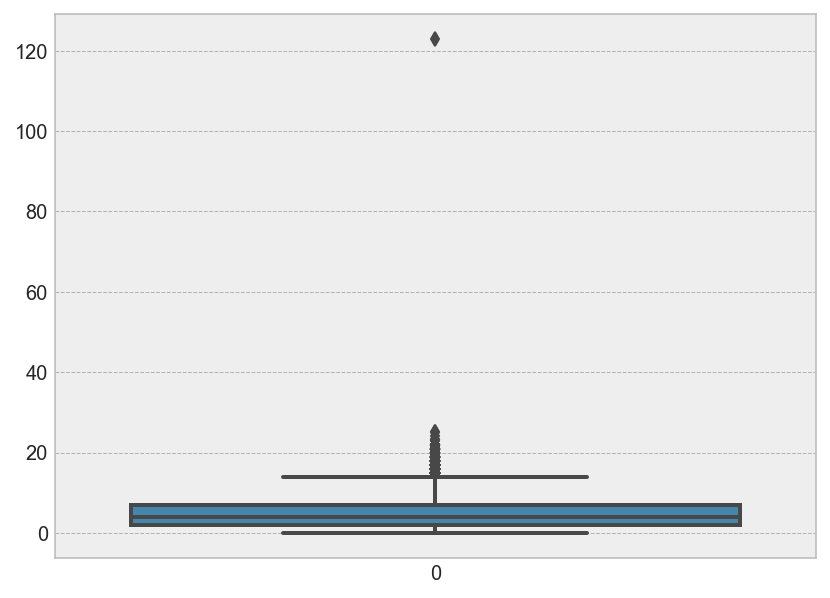

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(loan_df.person_emp_length)



<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

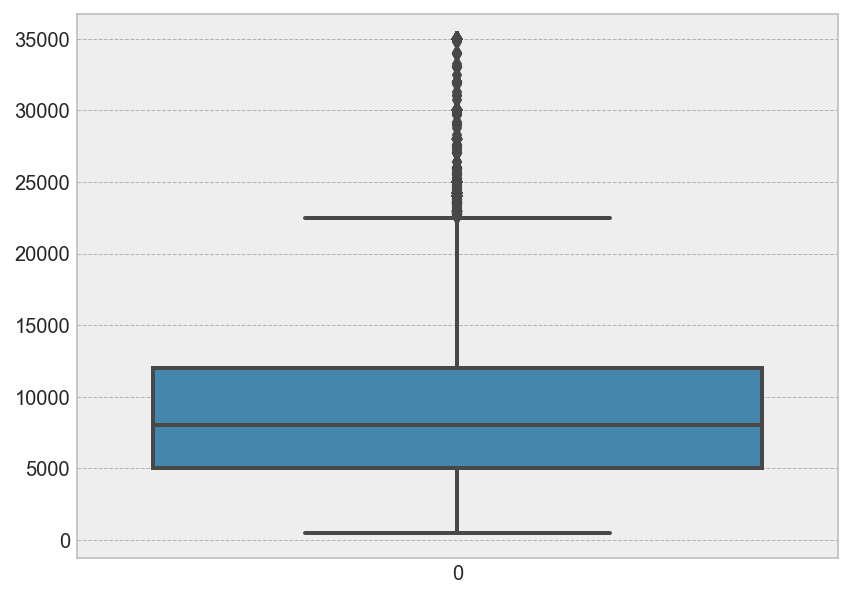

In [33]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(loan_df.loan_amnt)


<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

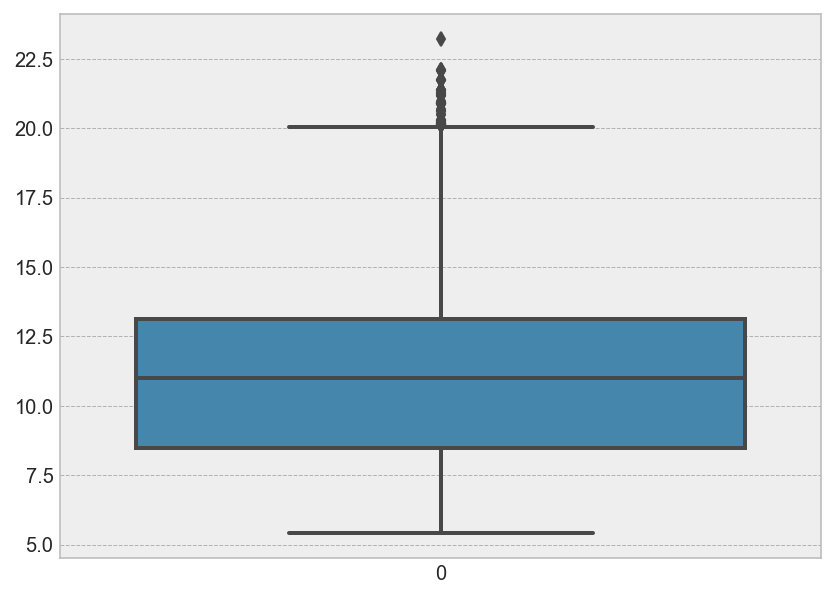

In [34]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(loan_df.loan_int_rate)



<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

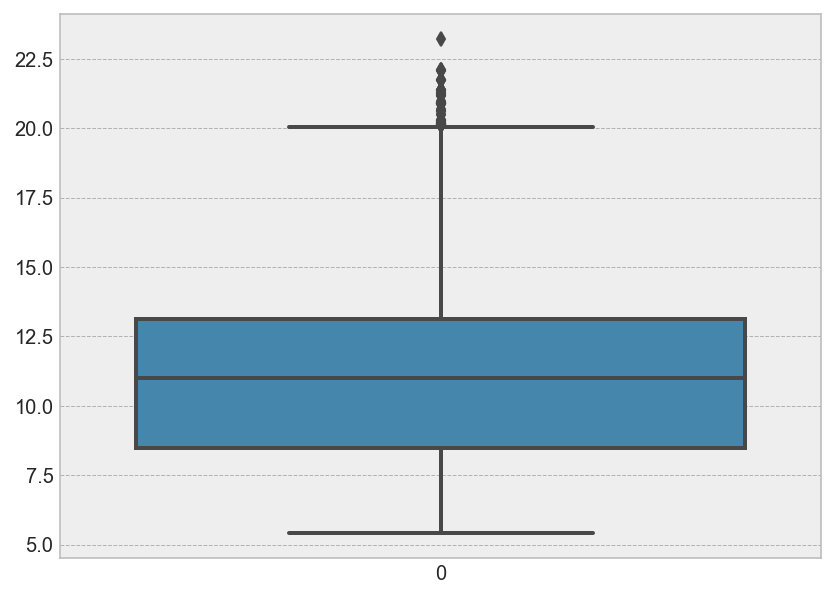

In [35]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(loan_df.loan_int_rate)



<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

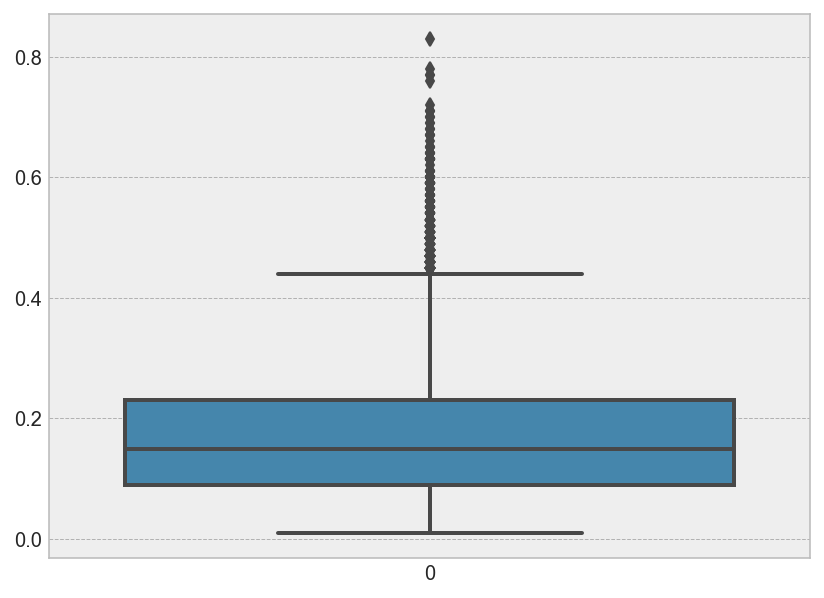

In [36]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(loan_df.loan_percent_income)



<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

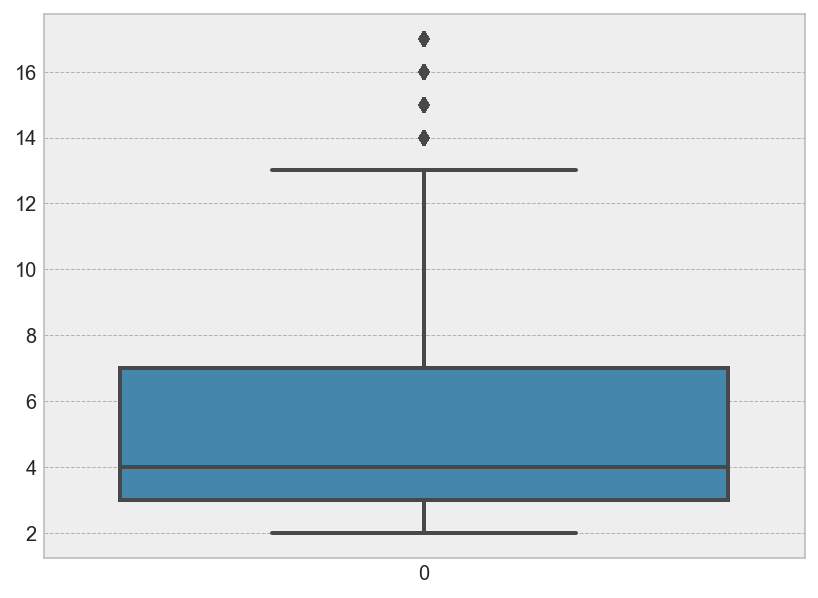

In [37]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(loan_df.cb_person_cred_hist_length)


## Data Visualization

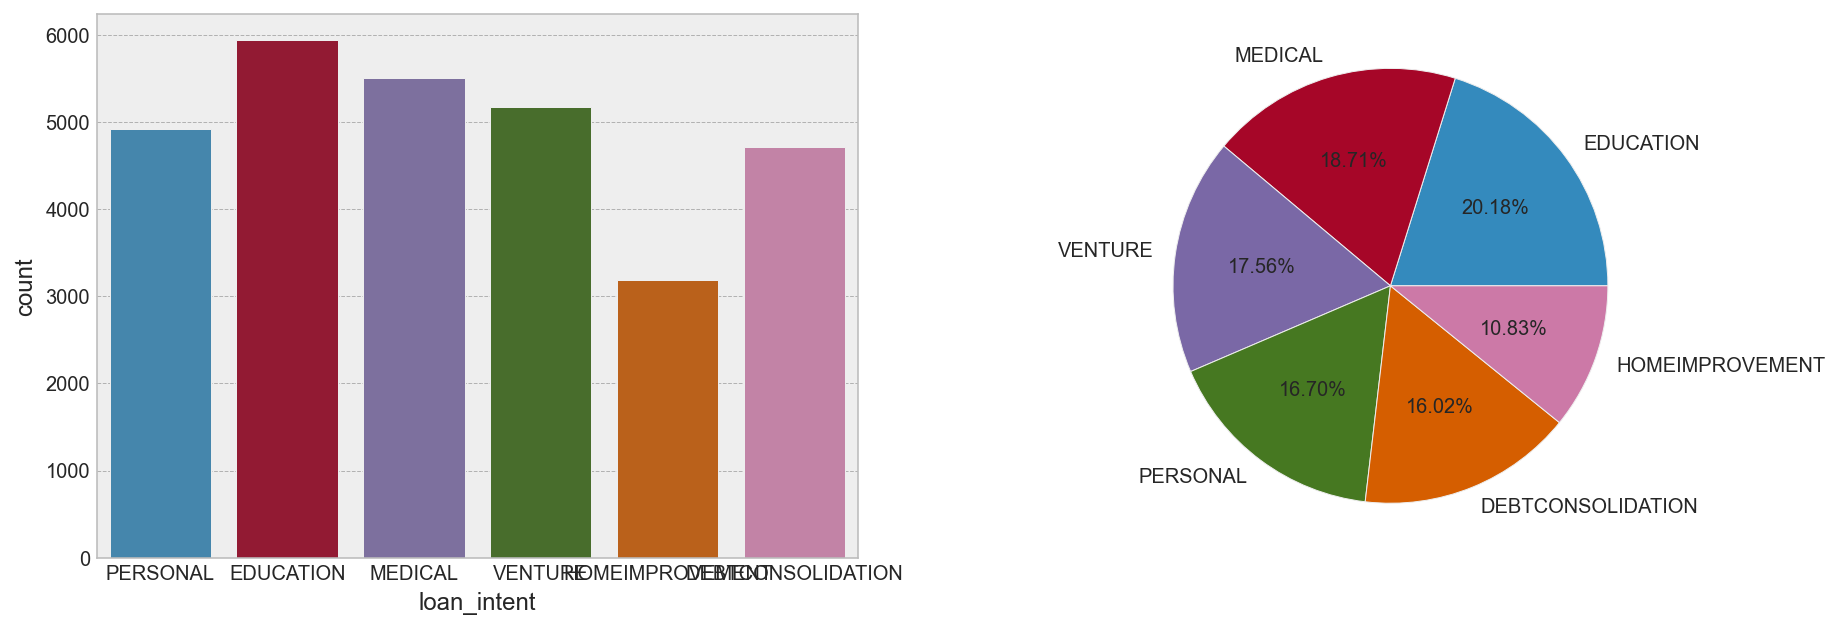

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=loan_df.loan_intent)
plt.subplot(122)
plt.pie(loan_df.loan_intent.value_counts().values,labels=loan_df.loan_intent.value_counts().index,autopct='%.2f%%');

**This is about loan intent based on pie chart**

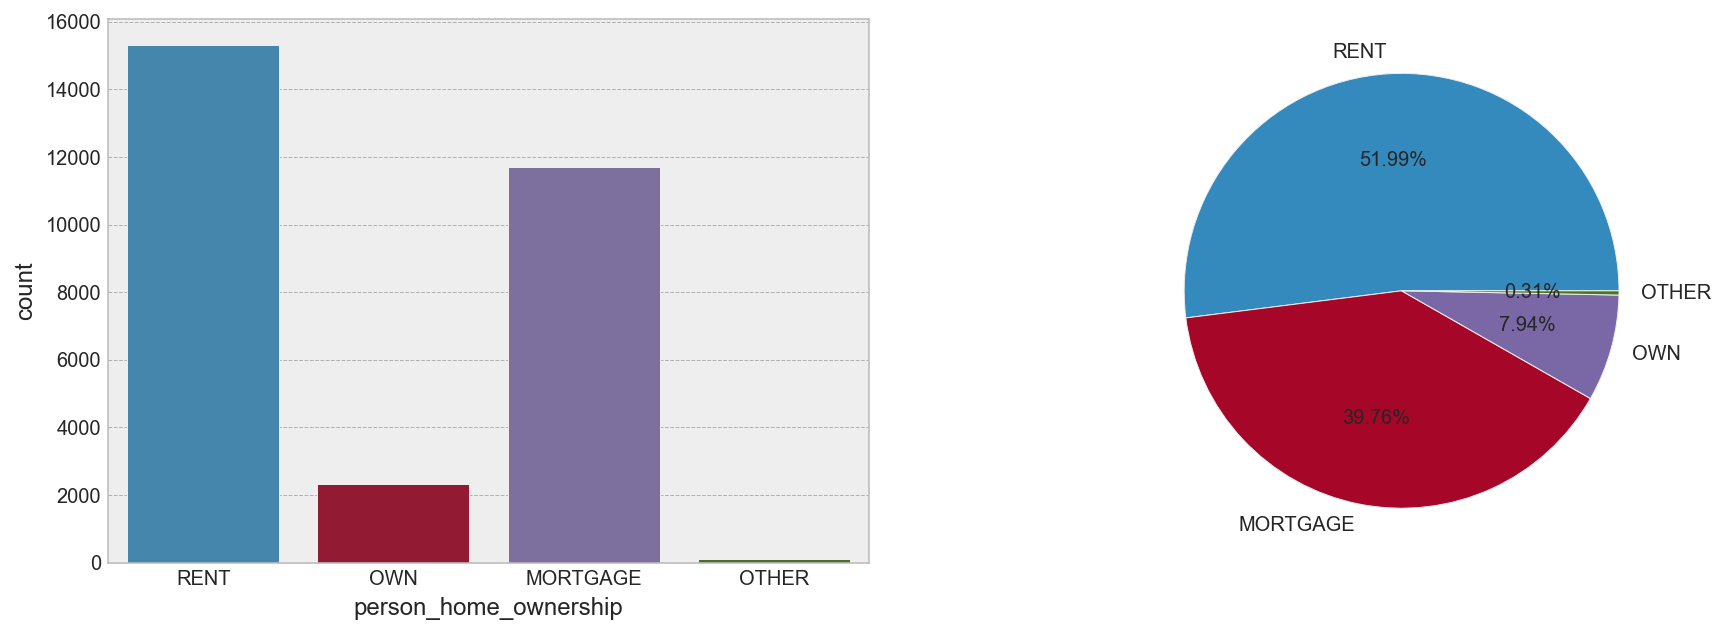

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=loan_df.person_home_ownership)
plt.subplot(122)
plt.pie(loan_df.person_home_ownership.value_counts().values,labels=loan_df.person_home_ownership.value_counts().index,autopct='%.2f%%');

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='loan_int_rate', ylabel='loan_amnt'>

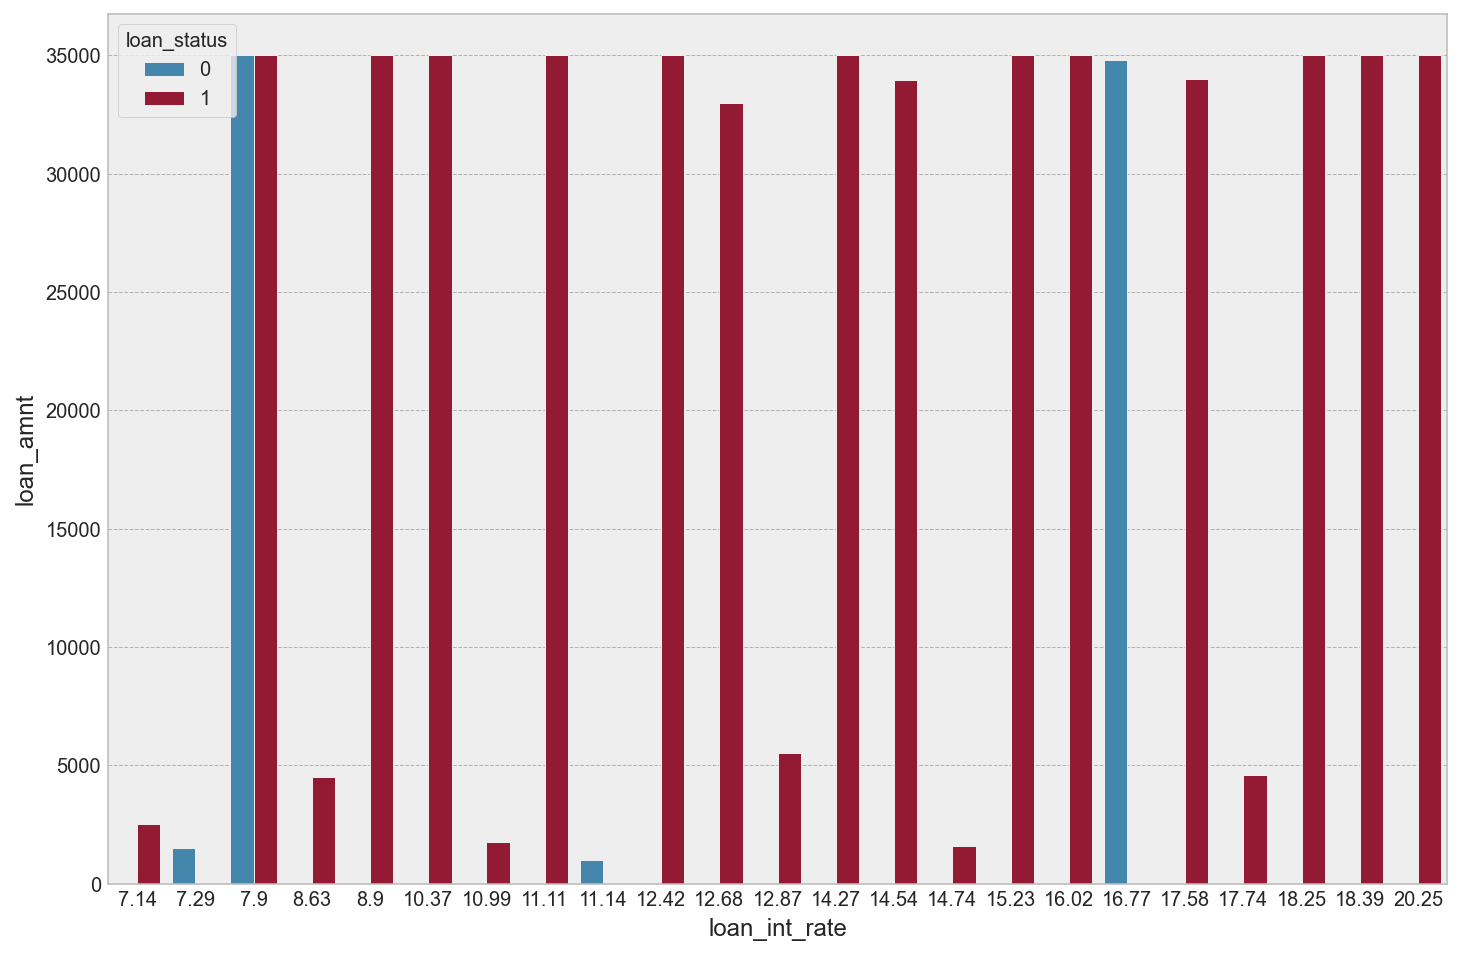

In [40]:
plt.figure(figsize=(12,8))
sns.barplot(x=loan_df.loan_int_rate[0:25],y=loan_df.loan_amnt,hue=loan_df.loan_status)

**This is the loan interset rate and amount based on loan status**

<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

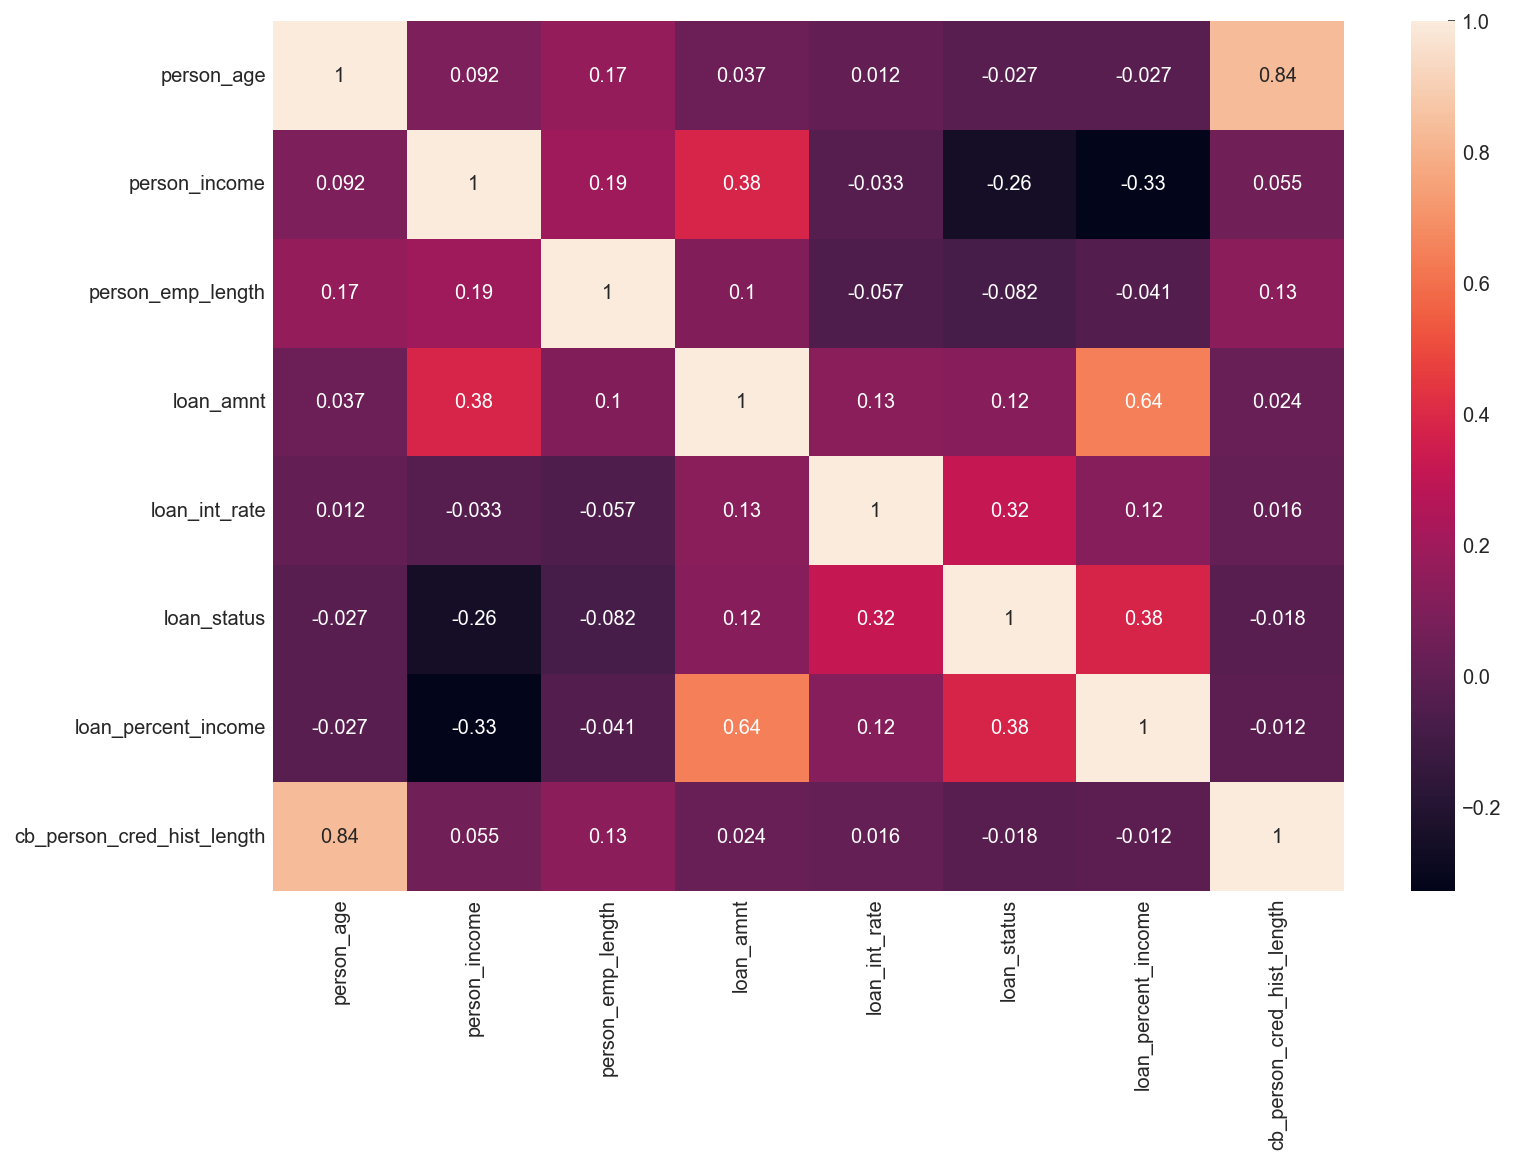

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_df.corr(),annot=True)

In [42]:
loan_df.to_csv(r"C:\Users\psath\Downloads\Machine Learning(Loan Prediction)\loan_cleaned.csv", index = False)

In [43]:
loan_df1 = pd.read_csv(r"C:\Users\psath\Downloads\Machine Learning(Loan Prediction)\loan_cleaned.csv", skipinitialspace = True)

In [44]:
loan_df1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
29452,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,B,1000,10.99,0,0.03,N,15
29453,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15
29454,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13
29455,36,92000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,4000,7.29,0,0.04,N,13


In [45]:
loan_df1 =loan_df1[['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income','cb_person_default_on_file', 'cb_person_cred_hist_length','loan_status']]
loan_df1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29452,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,B,1000,10.99,0.03,N,15,0
29453,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0.04,N,15,0
29454,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0.15,N,13,0
29455,36,92000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,4000,7.29,0.04,N,13,0


## Machine Learning Problem
* Build a system which can take features of Churn Prediction like person_age, person_income, ..... etc.. and predicts the loan default or not.\
Target Variable: loan default

## Identfying the Input and the Output Variables

In [46]:
y = loan_df1['loan_status']
x = loan_df1[['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income','cb_person_default_on_file', 'cb_person_cred_hist_length']]

In [47]:
y

0        1
1        0
2        1
3        1
4        1
        ..
29452    0
29453    0
29454    0
29455    0
29456    1
Name: loan_status, Length: 29457, dtype: int64

In [48]:
x

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
29452,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,B,1000,10.99,0.03,N,15
29453,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0.04,N,15
29454,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0.15,N,13
29455,36,92000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,4000,7.29,0.04,N,13


## Sepearting the Data into Train and Test

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(22092, 11) (22092,)
(7365, 11) (7365,)


In [50]:
x_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
22374,27,62000,MORTGAGE,6.0,DEBTCONSOLIDATION,B,15000,10.99,0.24,N,8
9053,23,60000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,6000,9.45,0.10,N,2
2908,25,37000,RENT,2.0,VENTURE,B,3325,11.49,0.09,N,3
11290,22,69000,MORTGAGE,1.0,EDUCATION,C,17000,15.27,0.25,N,3
12555,26,85000,MORTGAGE,10.0,PERSONAL,A,12000,6.62,0.14,N,3
...,...,...,...,...,...,...,...,...,...,...,...
13123,25,90000,MORTGAGE,7.0,PERSONAL,A,6000,7.14,0.07,N,3
19648,34,41600,MORTGAGE,16.0,DEBTCONSOLIDATION,A,17500,6.17,0.42,N,6
9845,25,65000,MORTGAGE,6.0,MEDICAL,B,15000,11.86,0.23,N,3
10799,24,55243,MORTGAGE,6.0,MEDICAL,B,2900,9.62,0.04,N,2


In [51]:
x_test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
11911,23,80000,MORTGAGE,7.0,EDUCATION,B,15000,12.42,0.19,N,2
12452,26,62000,RENT,10.0,VENTURE,B,12000,12.69,0.19,N,3
26464,28,80000,RENT,2.0,DEBTCONSOLIDATION,B,15000,11.48,0.19,N,5
22807,35,65000,MORTGAGE,5.0,DEBTCONSOLIDATION,B,25000,9.51,0.38,N,10
12477,26,84000,MORTGAGE,10.0,PERSONAL,B,4925,9.96,0.06,N,3
...,...,...,...,...,...,...,...,...,...,...,...
17328,32,17000,OWN,0.0,PERSONAL,D,3200,14.84,0.19,N,7
28458,36,95000,RENT,3.0,VENTURE,A,7375,8.94,0.08,N,15
25002,29,65000,RENT,1.0,EDUCATION,B,12800,9.45,0.20,N,10
3526,21,19000,RENT,3.0,EDUCATION,C,4000,14.35,0.21,Y,3


In [52]:
print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

(22092, 11) (22092,)
(7365, 11) (7365,)


## Separating Categorical and Numerical Columns

In [53]:
x_train.head(25)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
22374,27,62000,MORTGAGE,6.0,DEBTCONSOLIDATION,B,15000,10.99,0.24,N,8
9053,23,60000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,6000,9.45,0.10,N,2
2908,25,37000,RENT,2.0,VENTURE,B,3325,11.49,0.09,N,3
11290,22,69000,MORTGAGE,1.0,EDUCATION,C,17000,15.27,0.25,N,3
12555,26,85000,MORTGAGE,10.0,PERSONAL,A,12000,6.62,0.14,N,3
19152,29,38000,MORTGAGE,5.0,EDUCATION,A,8000,8.59,0.21,N,6
28785,40,60000,RENT,3.0,HOMEIMPROVEMENT,D,10000,15.95,0.17,N,14
9828,24,65000,MORTGAGE,3.0,DEBTCONSOLIDATION,C,7000,13.61,0.11,Y,3
4595,21,32000,RENT,3.0,EDUCATION,A,5000,7.68,0.16,N,4
21738,28,57000,OWN,7.0,PERSONAL,B,3500,11.83,0.06,N,6


In [54]:
x_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

## Seperating Label Encoding and One Hot Encoding Categorical Data

In [55]:
x_train_cat_ord = x_train[['loan_grade']]
x_train_cat_ohe = x_train[['person_home_ownership','loan_intent']]

In [56]:
x_train_cat_ohe

,person_home_ownership,loan_intent
22374,MORTGAGE,DEBTCONSOLIDATION
9053,MORTGAGE,DEBTCONSOLIDATION
2908,RENT,VENTURE
11290,MORTGAGE,EDUCATION
12555,MORTGAGE,PERSONAL
...,...,...
13123,MORTGAGE,PERSONAL
19648,MORTGAGE,DEBTCONSOLIDATION
9845,MORTGAGE,MEDICAL
10799,MORTGAGE,MEDICAL


In [57]:
x_train_cat_ord

,loan_grade
22374,B
9053,B
2908,B
11290,C
12555,A
...,...
13123,A
19648,A
9845,B
10799,B


In [58]:
x_train_num = x_train.select_dtypes(include=['int64', 'float64'])

x_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
22374,27,62000,6.0,15000,10.99,0.24,8
9053,23,60000,7.0,6000,9.45,0.10,2
2908,25,37000,2.0,3325,11.49,0.09,3
11290,22,69000,1.0,17000,15.27,0.25,3
12555,26,85000,10.0,12000,6.62,0.14,3


## Scaling the Numerical Features

In [59]:
x_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
22374,27,62000,6.0,15000,10.99,0.24,8
9053,23,60000,7.0,6000,9.45,0.10,2
2908,25,37000,2.0,3325,11.49,0.09,3
11290,22,69000,1.0,17000,15.27,0.25,3
12555,26,85000,10.0,12000,6.62,0.14,3


In [60]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

x_train_num_transformed = pd.DataFrame(scaler.fit_transform(x_train_num), 
                                    columns = x_train_num.columns, 
                                    index = x_train_num.index)

x_train_num_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
22374,0.064404,0.145265,0.357602,0.960876,-0.007202,0.606842,0.831205
9053,-0.823463,0.071120,0.617220,-0.539230,-0.505404,-0.698539,-0.982931
2908,-0.379529,-0.781554,-0.680867,-0.985095,0.154552,-0.791781,-0.680575
11290,-1.045429,0.404775,-0.940484,1.294233,1.377412,0.700084,-0.680575
12555,-0.157563,0.997939,1.396071,0.460841,-1.420932,-0.325573,-0.680575


In [61]:
x_train_num_transformed.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,2.209200e+04,2.209200e+04,2.209200e+04,2.209200e+04,2.209200e+04,2.209200e+04,2.209200e+04
mean,2.463678e-16,2.187077e-17,1.093539e-16,7.976399e-17,-7.574362e-17,-2.183861e-16,-1.016348e-16
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.489362e+00,-2.001989e+00,-1.200101e+00,-1.455962e+00,-1.809141e+00,-1.537713e+00,-9.829306e-01
25%,-8.234626e-01,-7.630174e-01,-6.808666e-01,-7.059089e-01,-8.159718e-01,-7.917807e-01,-6.805746e-01
50%,-3.795295e-01,-1.513167e-01,-1.616321e-01,-2.058734e-01,-7.201904e-03,-2.323315e-01,-3.782187e-01
75%,5.083368e-01,6.224660e-01,6.172197e-01,4.608405e-01,6.948104e-01,5.136008e-01,5.288492e-01
max,2.949969e+00,3.007283e+00,3.073282e+01,4.294446e+00,3.949301e+00,6.108093e+00,3.552409e+00


## Applying OneHotEncoding on Categorical Columns

In [62]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

x_train_cat_ohe_trans = pd.DataFrame(encoder.fit_transform(x_train_cat_ohe), 
                               columns=encoder.get_feature_names_out(x_train_cat_ohe.columns), 
                               index = x_train_cat_ohe.index)

x_train_cat_ohe_trans.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
22374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2908,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11290,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12555,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Apply Label Encoding

In [63]:
x_train_cat_le = pd.DataFrame(index=x_train_cat_ord.index)

x_train_cat_le.head()

""
22374
9053
2908
11290
12555


In [64]:
x_train_cat_ord.loan_grade.unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object)

In [65]:
grade_encoder = { 'A' : 1,'B' : 3, 'C' : 2, 'D' : 4, 'E' : 5,'F' : 6, 'G' : 7}

x_train_cat_le['loan_grade'] = x_train_cat_ord['loan_grade'].apply(lambda x : grade_encoder[x])

x_train_cat_le.head()

,loan_grade
22374,3
9053,3
2908,3
11290,2
12555,1


In [66]:
loan_df1.groupby(['loan_grade'])['loan_amnt'].mean()

loan_grade
A     8342.261661
B     9577.391466
C     8933.348912
D    10450.396583
E    12214.038687
F    14244.497608
G    16941.101695
Name: loan_amnt, dtype: float64

## Concatenating Numerical and Categorical Columns

In [67]:
x_train_transformed = pd.concat([x_train_num_transformed, x_train_cat_ohe_trans, x_train_cat_le], axis=1)

x_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade
22374,0.064404,0.145265,0.357602,0.960876,-0.007202,0.606842,0.831205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
9053,-0.823463,0.071120,0.617220,-0.539230,-0.505404,-0.698539,-0.982931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2908,-0.379529,-0.781554,-0.680867,-0.985095,0.154552,-0.791781,-0.680575,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3
11290,-1.045429,0.404775,-0.940484,1.294233,1.377412,0.700084,-0.680575,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
12555,-0.157563,0.997939,1.396071,0.460841,-1.420932,-0.325573,-0.680575,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


## Preparing Test Data

In [68]:
x_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
11911,23,80000,MORTGAGE,7.0,EDUCATION,B,15000,12.42,0.19,N,2
12452,26,62000,RENT,10.0,VENTURE,B,12000,12.69,0.19,N,3
26464,28,80000,RENT,2.0,DEBTCONSOLIDATION,B,15000,11.48,0.19,N,5
22807,35,65000,MORTGAGE,5.0,DEBTCONSOLIDATION,B,25000,9.51,0.38,N,10
12477,26,84000,MORTGAGE,10.0,PERSONAL,B,4925,9.96,0.06,N,3


In [69]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7365 entries, 11911 to 22217
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  7365 non-null   int64  
 1   person_income               7365 non-null   int64  
 2   person_home_ownership       7365 non-null   object 
 3   person_emp_length           7365 non-null   float64
 4   loan_intent                 7365 non-null   object 
 5   loan_grade                  7365 non-null   object 
 6   loan_amnt                   7365 non-null   int64  
 7   loan_int_rate               7365 non-null   float64
 8   loan_percent_income         7365 non-null   float64
 9   cb_person_default_on_file   7365 non-null   object 
 10  cb_person_cred_hist_length  7365 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 690.5+ KB


In [70]:
x_test_cat_ord = x_test[['loan_grade']]
x_test_cat_ohe = x_test[['person_home_ownership','loan_intent']]

In [71]:
x_test_cat_ord

,loan_grade
11911,B
12452,B
26464,B
22807,B
12477,B
...,...
17328,D
28458,A
25002,B
3526,C


In [72]:
x_test_num = x_test.select_dtypes(include=['int64', 'float64'])

x_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
11911,23,80000,7.0,15000,12.42,0.19,2
12452,26,62000,10.0,12000,12.69,0.19,3
26464,28,80000,2.0,15000,11.48,0.19,5
22807,35,65000,5.0,25000,9.51,0.38,10
12477,26,84000,10.0,4925,9.96,0.06,3


In [73]:
x_test_num_transformed = pd.DataFrame(scaler.transform(x_test_num), 
                                   columns = x_test_num.columns, 
                                   index = x_test_num.index)

x_test_num_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
11911,-0.823463,0.812575,0.617220,0.960876,0.455415,0.140635,-0.982931
12452,-0.157563,0.145265,1.396071,0.460841,0.542762,0.140635,-0.680575
26464,0.286370,0.812575,-0.680867,0.960876,0.151317,0.140635,-0.075863
22807,1.840136,0.256484,0.097985,2.627661,-0.485994,1.912224,1.435917
12477,-0.157563,0.960866,1.396071,-0.718410,-0.340415,-1.071505,-0.680575


In [74]:
x_test_cat_ohe_trans = pd.DataFrame(encoder.transform(x_test_cat_ohe), 
                               columns=encoder.get_feature_names_out(x_test_cat_ohe.columns), 
                               index = x_test_cat_ohe.index)

x_test_cat_ohe_trans.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
11911,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12452,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
26464,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12477,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [75]:
x_test_cat_le = pd.DataFrame(index = x_test_cat_ord.index)

x_test_cat_le.head()

""
11911
12452
26464
22807
12477


In [76]:
x_test_cat_le['loan_grade'] = x_test_cat_ord['loan_grade'].apply(lambda x : grade_encoder[x])

In [77]:
x_test_cat_le

,loan_grade
11911,3
12452,3
26464,3
22807,3
12477,3
...,...
17328,4
28458,1
25002,3
3526,2


## Concatenating Numerical and Categorical Columns

In [78]:
x_test_transformed = pd.concat([x_test_num_transformed, x_test_cat_ohe_trans, x_test_cat_le], axis=1)

x_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade
11911,-0.823463,0.812575,0.617220,0.960876,0.455415,0.140635,-0.982931,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
12452,-0.157563,0.145265,1.396071,0.460841,0.542762,0.140635,-0.680575,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3
26464,0.286370,0.812575,-0.680867,0.960876,0.151317,0.140635,-0.075863,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
22807,1.840136,0.256484,0.097985,2.627661,-0.485994,1.912224,1.435917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
12477,-0.157563,0.960866,1.396071,-0.718410,-0.340415,-1.071505,-0.680575,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3


## Logestic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train_transformed, y_train)

LogisticRegression()

In [80]:
y_test_pred = classifier.predict(x_test_transformed)

In [81]:
from sklearn import metrics
# from sklearn.metrics import accuracy score

a = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy', a)

Accuracy 0.8475220638153428


In [82]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)



b = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy', b)

KNeighborsClassifier()

Accuracy 0.8854039375424304


## DT Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

c = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy', c)

DecisionTreeClassifier()

Accuracy 0.8875763747454175


## Support Vector Classifier

In [84]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

d = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy', d)

SVC()

Accuracy 0.9026476578411405


## Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

e = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy', e)

RandomForestClassifier()

Accuracy 0.9304820095044127


## Gradient Boosting Classifier

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

f = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy', f)

GradientBoostingClassifier()

Accuracy 0.9207060420909708


## ADA Boost Classifier

In [87]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

g = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy', g)

AdaBoostClassifier()

Accuracy 0.8837746096401901


## Bagging Classifier

In [88]:
from sklearn.ensemble import BaggingClassifier
classifier = BaggingClassifier()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

h = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy', h)

BaggingClassifier()

Accuracy 0.9287169042769857


In [89]:
df_data = [['Logistic Regression', a ],
                   ['Decision Tree Classifier',c],
                   ['Support Vector Classifier',d],
                   ['Random Forest Classifier ',e],
                ['Gradient Boosting Decision Tree Clasifier', f],
          ['Adaptive Boosting Clasifier', g],
          ['BaggingClassifier', h],
          ['KNNClassifier', b] ]

data = pd.DataFrame(df_data, columns = ['Algorithm','Accuracy'])

In [90]:
data

,Algorithm,Accuracy
0,Logistic Regression,0.847522
1,Decision Tree Classifier,0.887576
2,Support Vector Classifier,0.902648
3,Random Forest Classifier,0.930482
4,Gradient Boosting Decision Tree Clasifier,0.920706
5,Adaptive Boosting Clasifier,0.883775
6,BaggingClassifier,0.928717
7,KNNClassifier,0.885404


<Figure size 1080x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='Accuracy', ylabel='Algorithm'>

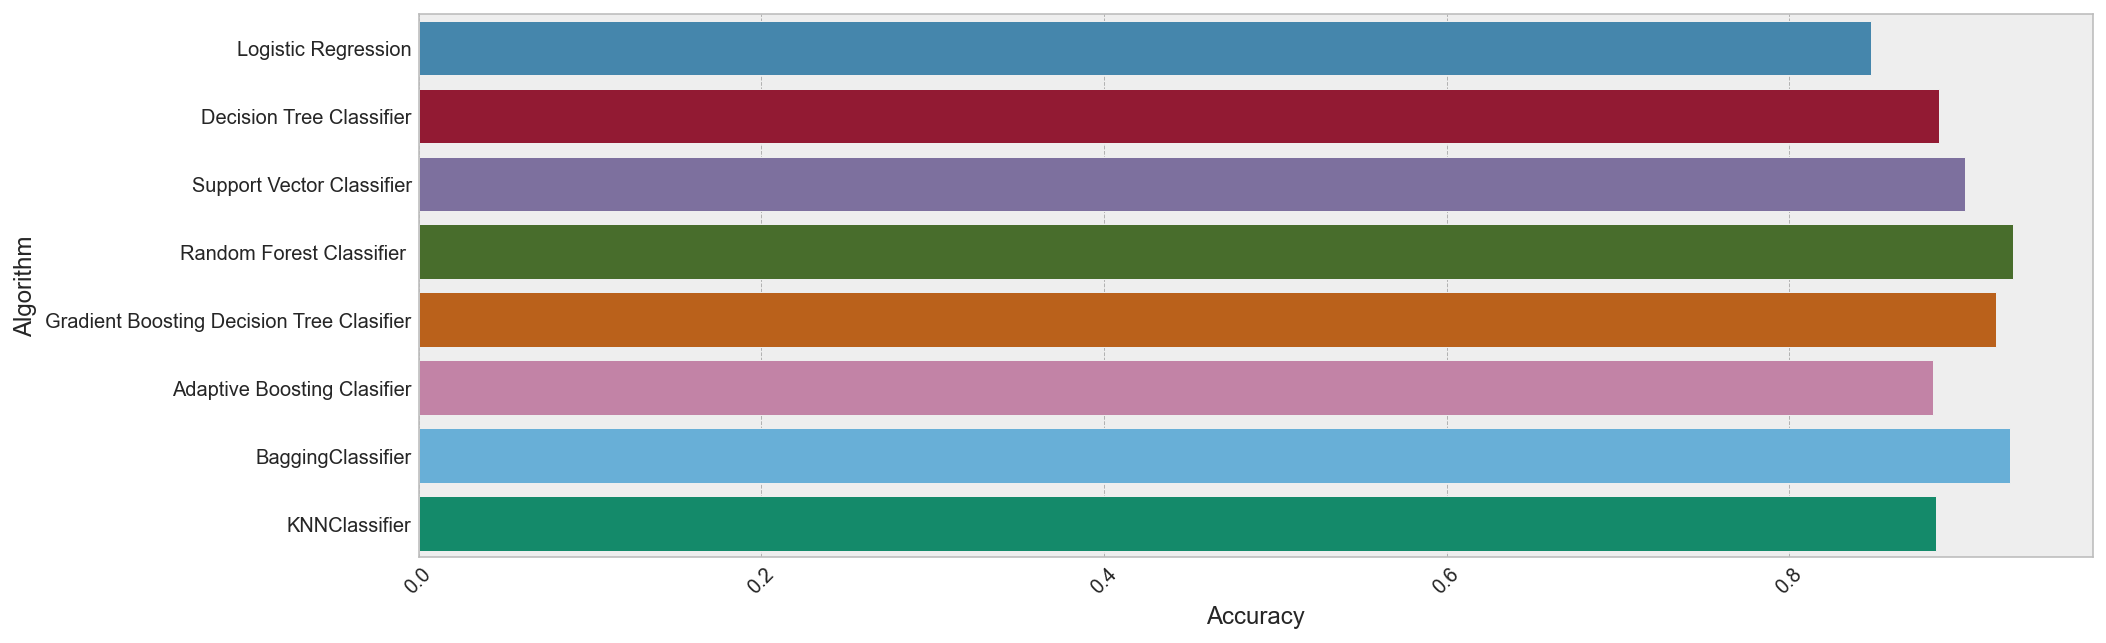

In [91]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
sns.barplot(x = data.Accuracy, y = data.Algorithm, ci = False)

## Conclusion
* From The Above Graph `Random Forest Classifier` is more accurate with 93.04% and second is `BaggingClassifier` with 92.8% and third is `Gradient Boosting Decision Tree Clasifier` is with 92.07%
* So Finally `Random Forest Classifier` is the best algorithm 